In [1]:
#Data Analysis of McAffe Data''
#I shall proceed with some assumptions and following steps before making any Statistical conclusion"
# I am buidling a pipeline such that work can be deployed later on for real time prediction

#a. Data Analysis 
#b. Feature Engineering 
#c. Feature Selection 
#d. Model building 
#e. Statistical Conclusion 

In [2]:
                                 # Data Analysis 

In [3]:
# to handle datasets
import pandas as pd
import numpy as np

# for plotting
import matplotlib.pyplot as plt

# to display all the columns of the dataframe in the notebook
pd.pandas.set_option('display.max_columns', None)

In [4]:
# load dataset
data = pd.read_csv('mc_data.csv')

# rows and columns of the data
print(data.shape)

# visualise the dataset
data.head()

(50000, 29)


,label,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28
0,1,4438827,2858,95,20,0,1,0,790,1,0,0,53,0,1,0,0,0,0,0,0,0,9,3,0,0,0,0,0
1,1,4145089,4728,199,10,0,0,6,1821,0,0,0,45,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
2,1,4409677,1240,35,6,0,0,0,132,1,0,0,6,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0
3,1,4705142,6249,152,7,0,0,10,269,0,0,0,20,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
4,1,4424842,4446,78,21,0,0,0,615,1,0,0,28,0,0,0,0,0,0,0,0,0,3,3,0,0,0,0,0


In [5]:
                                       # Missing Values Analysis 

In [6]:
# make a list of the variables that contain missing values
vars_with_na = [var for var in data.columns if data[var].isnull().sum() > 0]
# determine percentage of missing values
data[vars_with_na].isnull().mean()

Series([], dtype: float64)

In [7]:
# no missing values so we can skip any analysis on response variable on missing values , 
# otherwise an analysis should be done 


In [8]:
                                        # get the numerical values 

In [9]:
num_vars = [var for var in data.columns if data[var].dtypes != 'O']
print('Number of numerical variables: ', len(num_vars))
# visualise the numerical variables
data[num_vars].head()

Number of numerical variables:  29


,label,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28
0,1,4438827,2858,95,20,0,1,0,790,1,0,0,53,0,1,0,0,0,0,0,0,0,9,3,0,0,0,0,0
1,1,4145089,4728,199,10,0,0,6,1821,0,0,0,45,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
2,1,4409677,1240,35,6,0,0,0,132,1,0,0,6,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0
3,1,4705142,6249,152,7,0,0,10,269,0,0,0,20,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
4,1,4424842,4446,78,21,0,0,0,615,1,0,0,28,0,0,0,0,0,0,0,0,0,3,3,0,0,0,0,0


In [10]:
                                        # get the discrete values

In [11]:
discrete_vars = [var for var in num_vars if len(
    data[var].unique()) <=10]

print('Number of discrete variables: ', len(discrete_vars))
data[discrete_vars].head()

Number of discrete variables:  10


,label,f6,f10,f11,f16,f24,f25,f26,f27,f28
0,1,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0


f6         0     1    2   3   4  5  6  7
label                                   
0      35836   733    9   0   0  0  0  0
1      11757  1478  106  42  22  9  5  3
f10        0  1  2  3  4
label                   
0      36573  4  0  0  1
1      13406  8  4  4  0
f11        0  1
label          
0      36578  0
1      13415  7
f16        0
label       
0      36578
1      13422
f24        0   1
label           
0      36565  13
1      13422   0
f25        0   1  2  3
label                 
0      36540  35  3  0
1      13409   4  3  6
f26        0   1  2
label              
0      36533  44  1
1      13410   4  8
f27        0   1  2  3
label                 
0      36566  12  0  0
1      13416   0  1  5
f28        0   1
label           
0      36566  12
1      13422   0


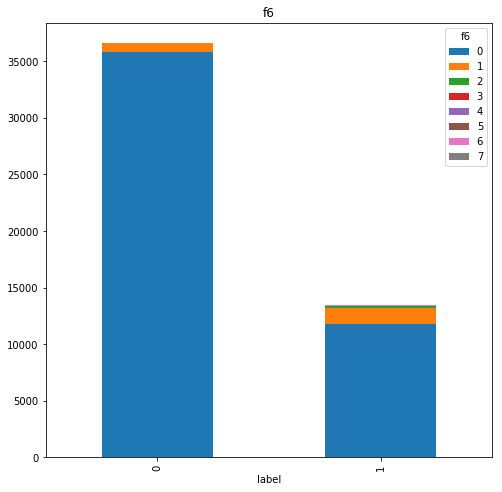

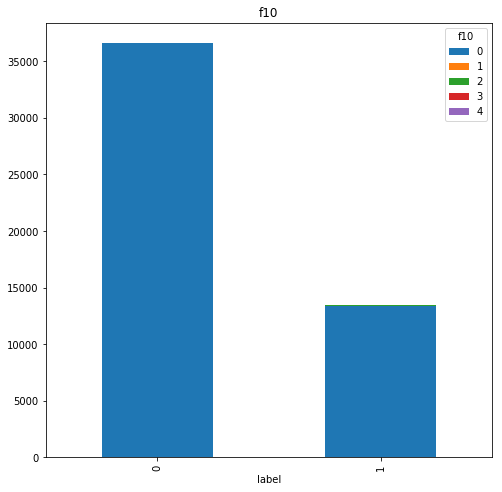

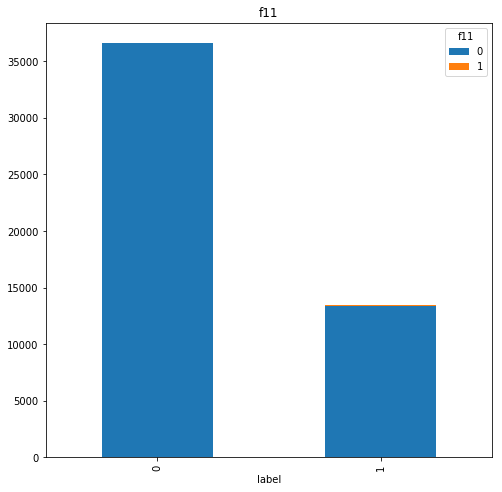

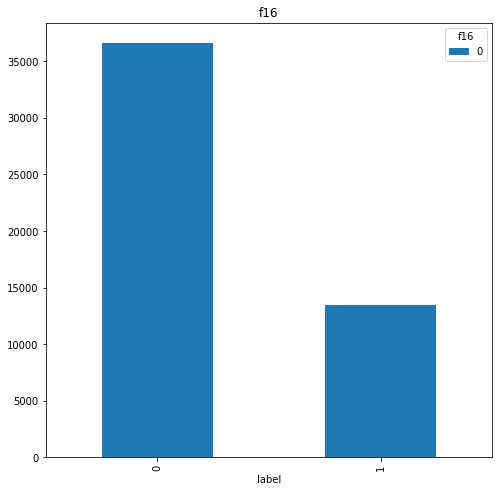

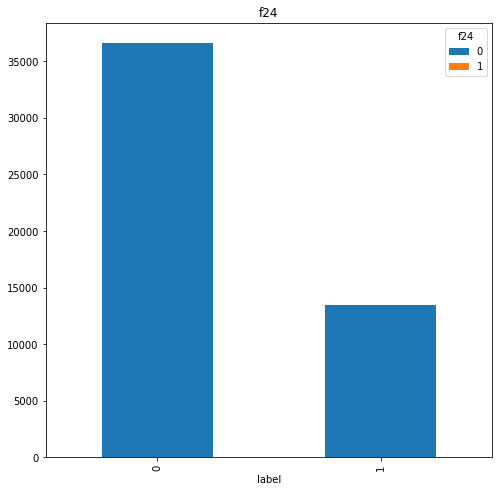

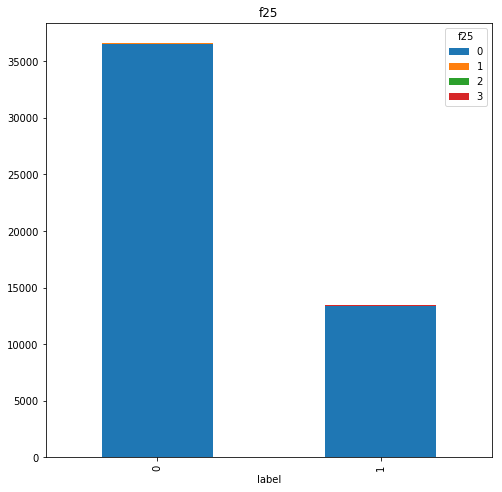

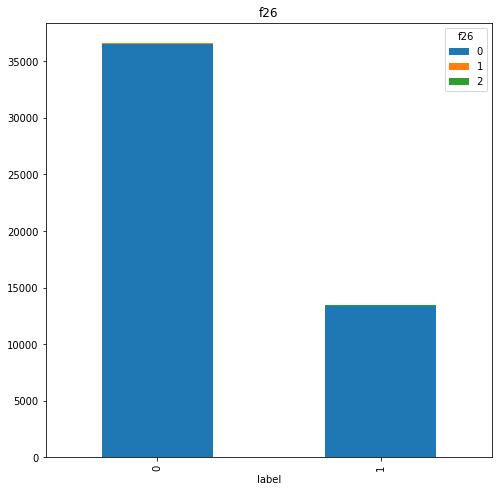

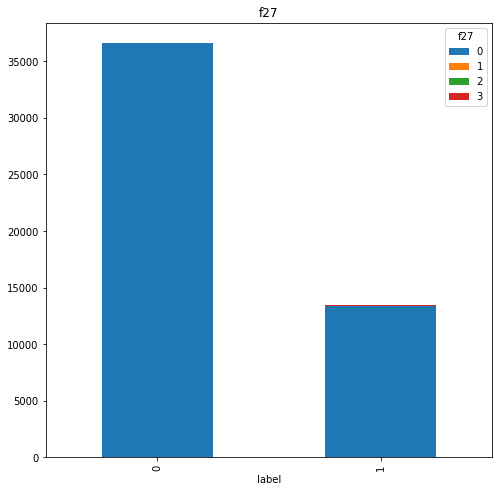

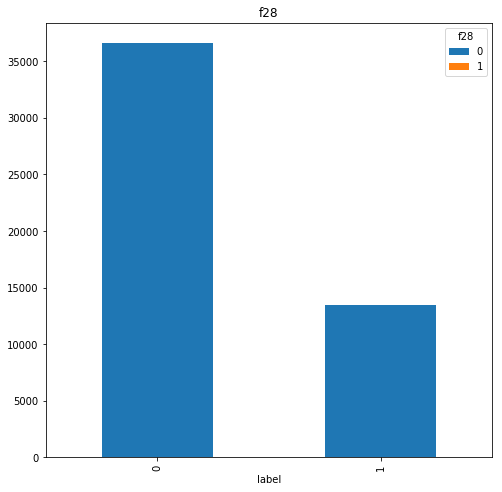

In [12]:
def analyse_discrete(df, var):
    df = df.copy()
    grouped = df.groupby(['label',var])
    clarity_table = pd.crosstab(index=df["label"], 
                          columns=df[var])
    print(clarity_table)
    clarity_table.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)   
    plt.title(var)
for var in discrete_vars:
    if var != 'label':
        analyse_discrete(data, var)

In [13]:
                                 # continuous variables 

In [14]:
# make list of continuous variables
cont_vars = [
    var for var in num_vars if var not in discrete_vars]

print('Number of continuous variables: ', len(cont_vars))

Number of continuous variables:  19


In [15]:
# let's visualise the continuous variables

data[cont_vars].head()

,f1,f2,f3,f4,f5,f7,f8,f9,f12,f13,f14,f15,f17,f18,f19,f20,f21,f22,f23
0,4438827,2858,95,20,0,0,790,1,53,0,1,0,0,0,0,0,0,9,3
1,4145089,4728,199,10,0,6,1821,0,45,0,0,0,0,0,0,0,0,1,1
2,4409677,1240,35,6,0,0,132,1,6,0,0,0,0,0,0,0,0,2,0
3,4705142,6249,152,7,0,10,269,0,20,0,0,0,0,0,0,0,0,1,1
4,4424842,4446,78,21,0,0,615,1,28,0,0,0,0,0,0,0,0,3,3


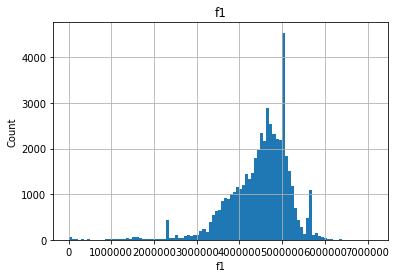

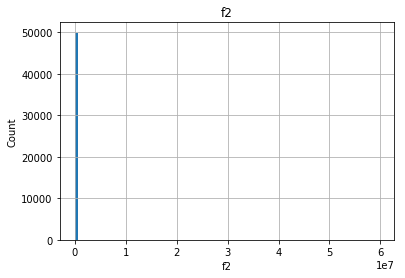

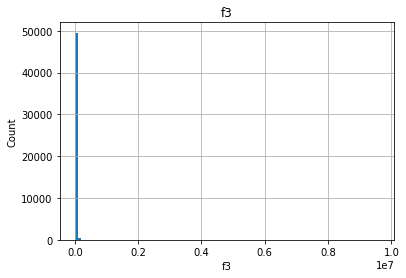

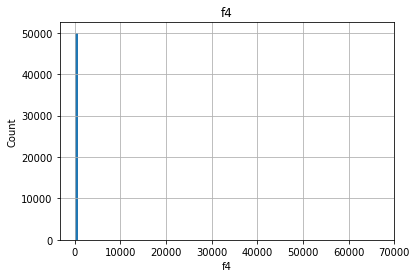

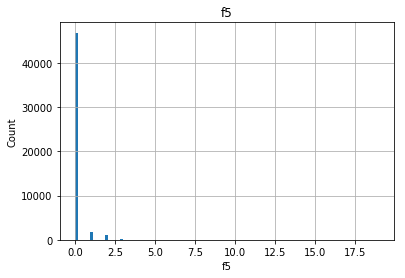

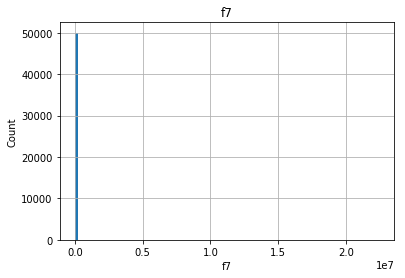

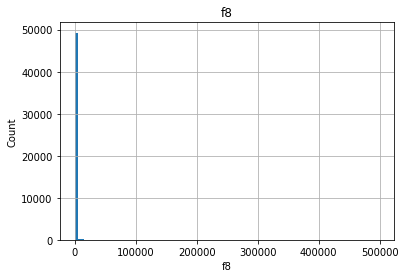

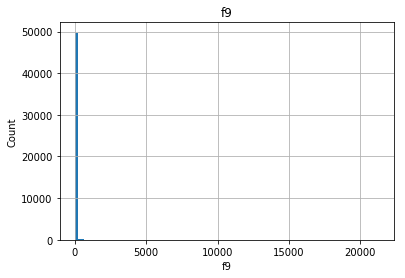

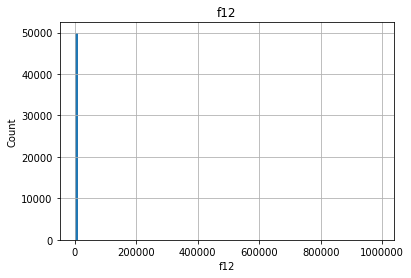

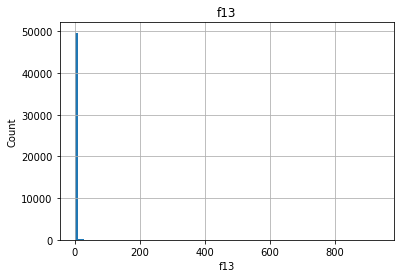

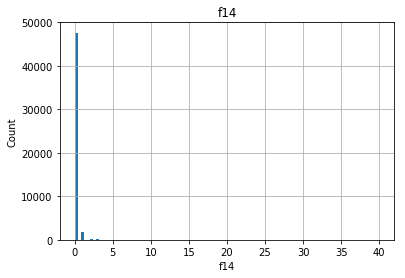

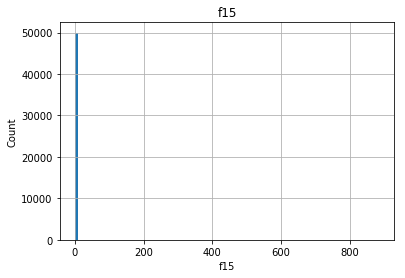

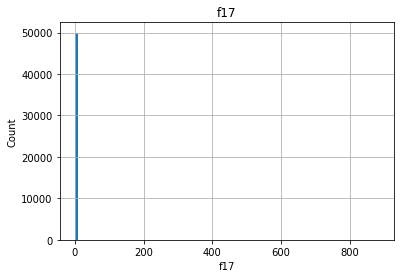

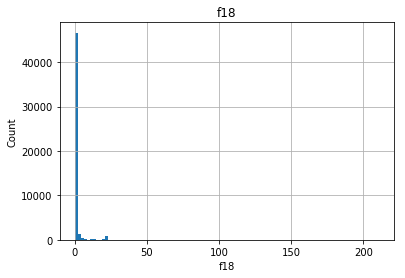

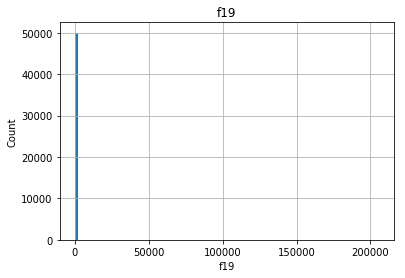

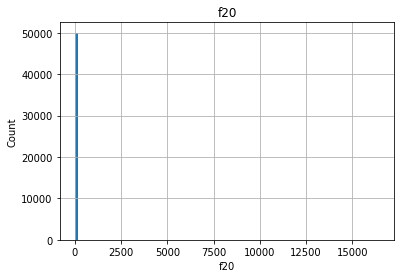

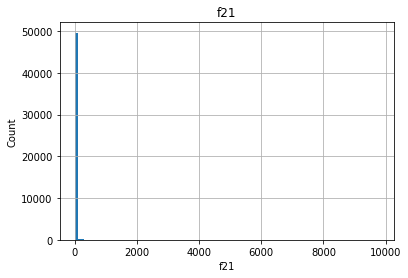

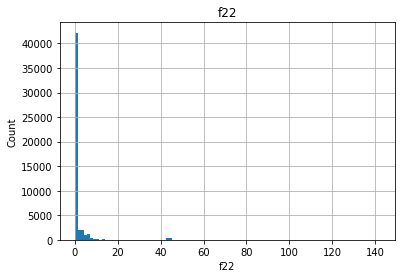

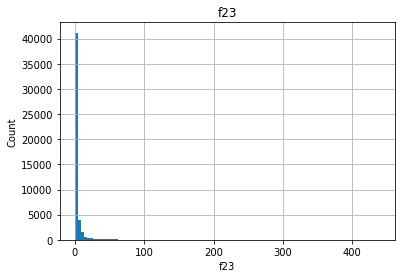

In [67]:
def analyse_continuous(df, var):
    df = df.copy()
    df[var].hist(bins = 100)
    plt.ylabel('Count')
    plt.xlabel(var)
    plt.title(var)
    plt.show()

for var in cont_vars:
    analyse_continuous(data, var)

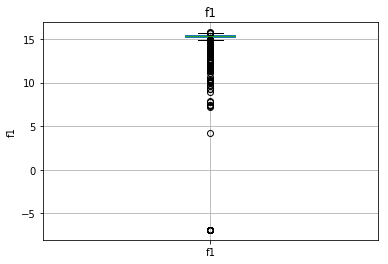

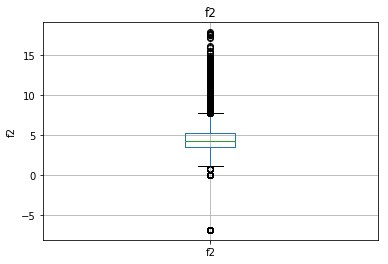

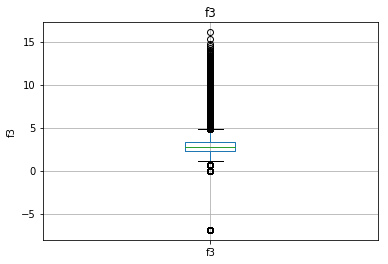

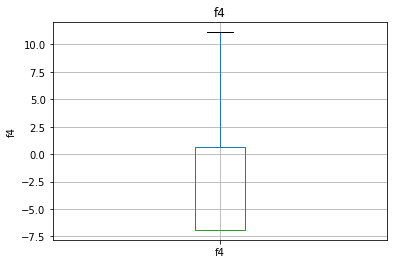

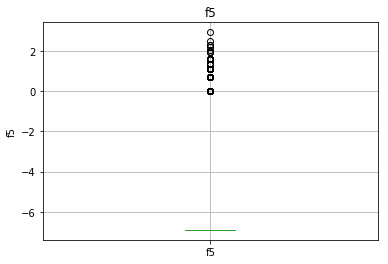

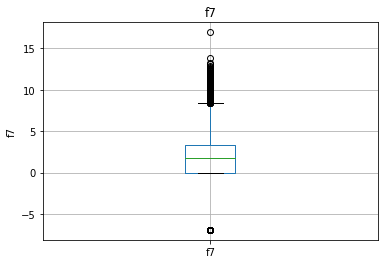

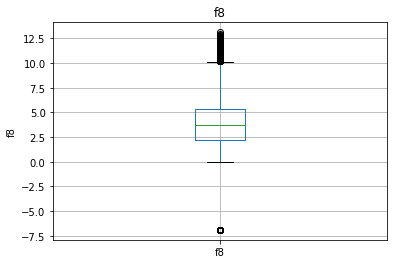

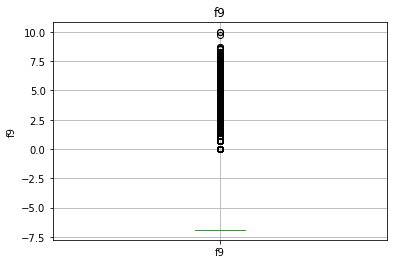

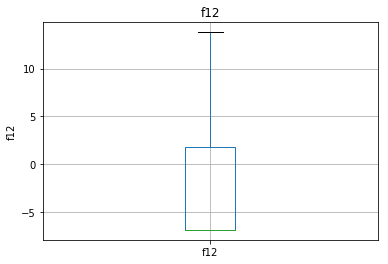

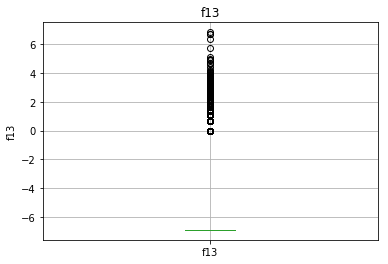

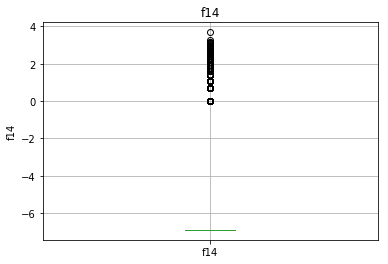

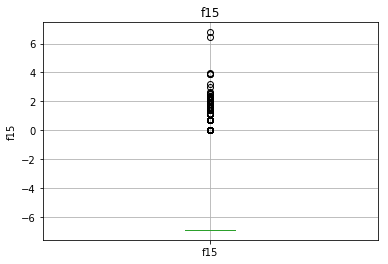

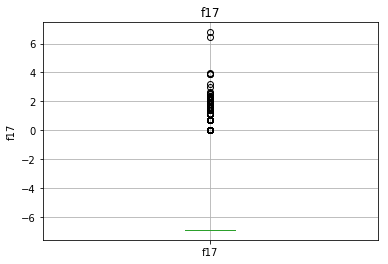

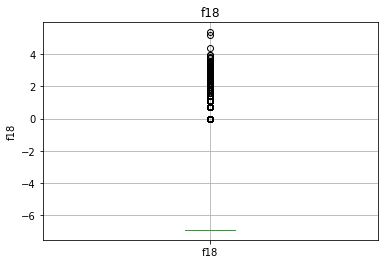

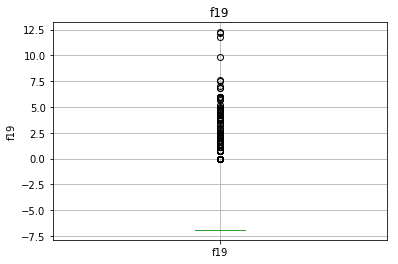

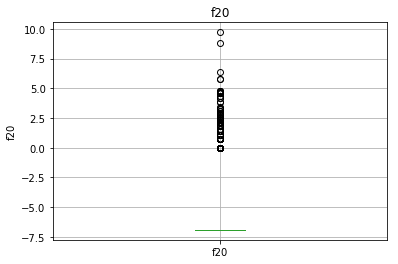

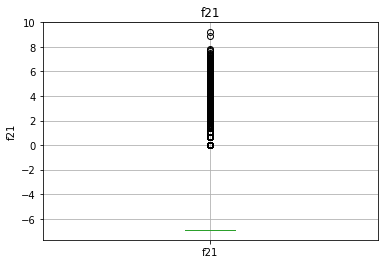

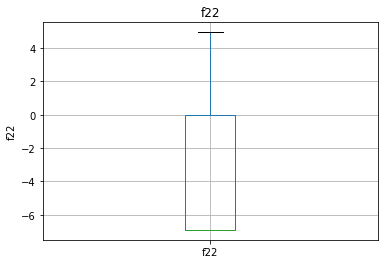

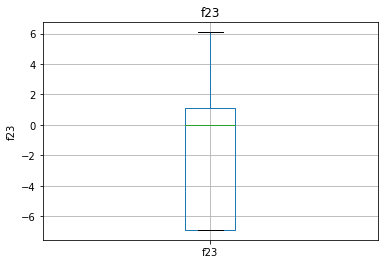

In [65]:
def analyse_continuous_box_plot(df,var):
        df = df.copy()
        if any(df[var] <= 0):
            df[var]+=0.001
        
        df[var] = np.log(df[var])
        df.boxplot(column = var)
        plt.title(var)
        plt.ylabel(var)
        plt.show()
        
for var in cont_vars:
    analyse_continuous_box_plot(data,var)

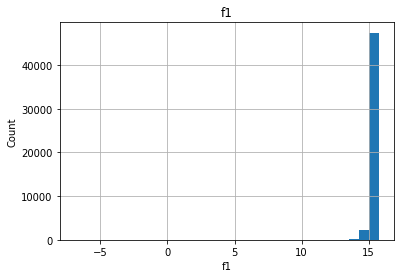

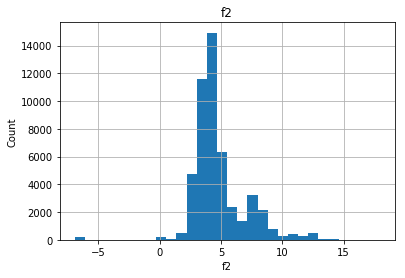

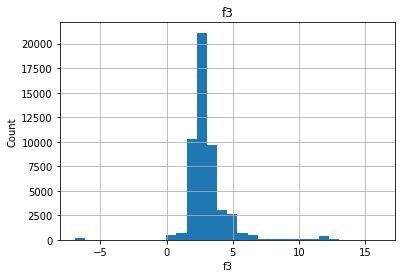

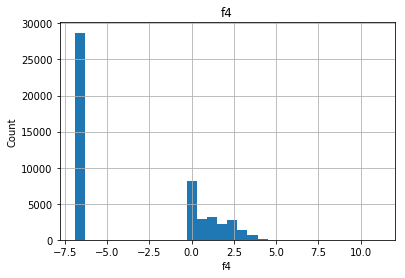

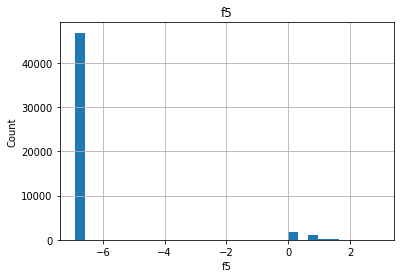

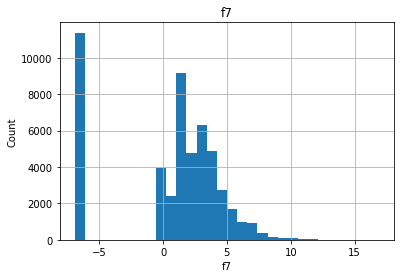

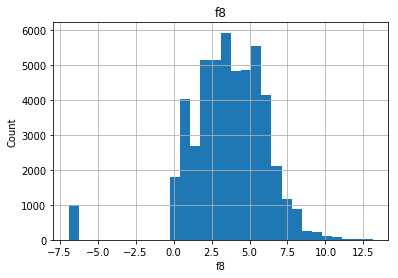

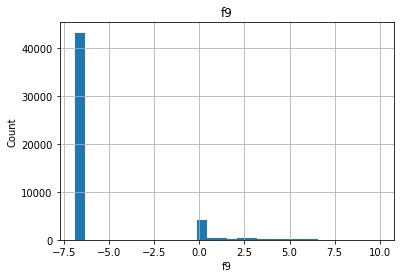

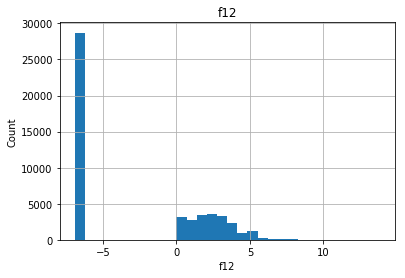

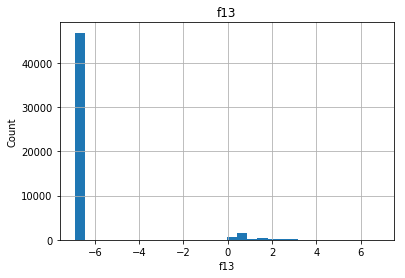

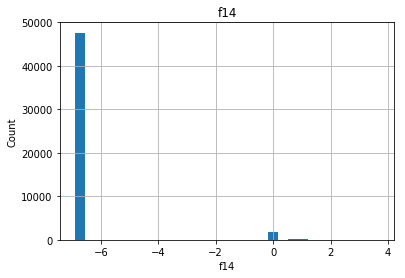

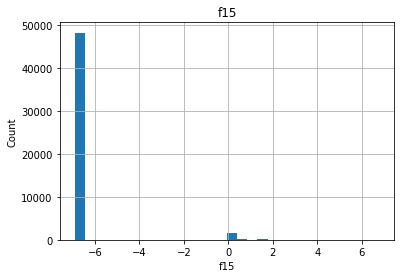

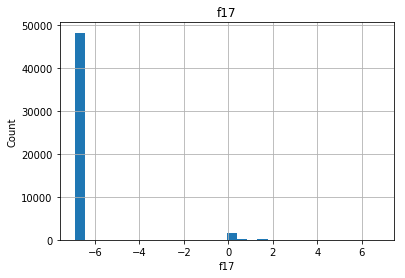

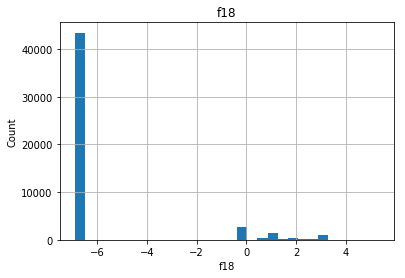

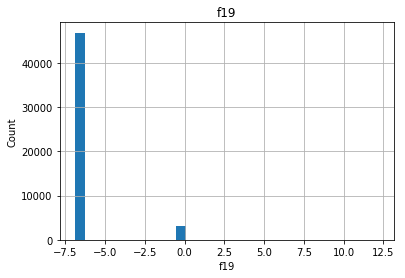

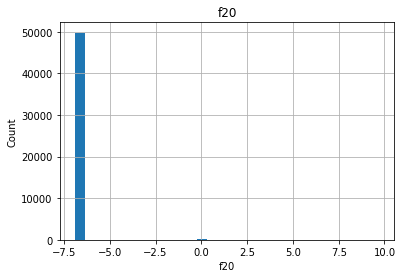

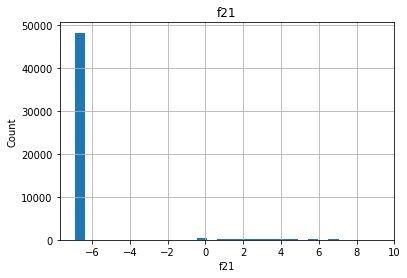

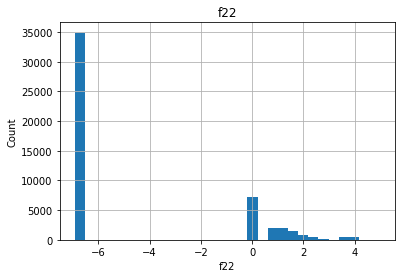

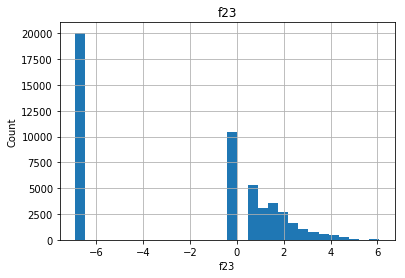

In [70]:
def analyse_transformed_continuous(df, var):
    df = df.copy()

    # log does not take 0 or negative values, so let's be
    # careful and skip those variables
    if any(df[var] <= 0):
        df[var]+=0.001
        # log transform the variable
    df[var] = np.log(df[var])
    df[var].hist(bins= 30)
    plt.ylabel('Count')
    plt.xlabel(var)
    plt.title(var)
    plt.show()
    
        
for var in cont_vars:
    analyse_transformed_continuous(data, var)

,label,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28
0,1,4438827,2858,95,20,0,1,0,790,1,0,0,53,0,1,0,0,0,0,0,0,0,9,3,0,0,0,0,0
1,1,4145089,4728,199,10,0,0,6,1821,0,0,0,45,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
2,1,4409677,1240,35,6,0,0,0,132,1,0,0,6,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0
3,1,4705142,6249,152,7,0,0,10,269,0,0,0,20,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
4,1,4424842,4446,78,21,0,0,0,615,1,0,0,28,0,0,0,0,0,0,0,0,0,3,3,0,0,0,0,0


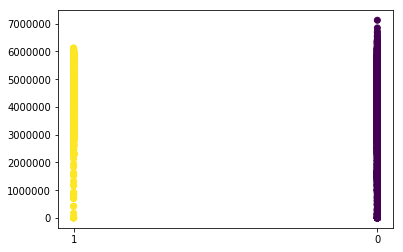

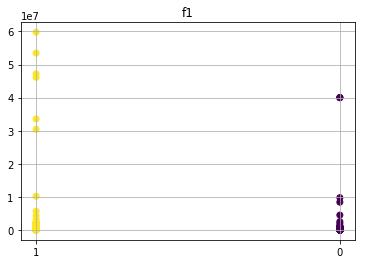

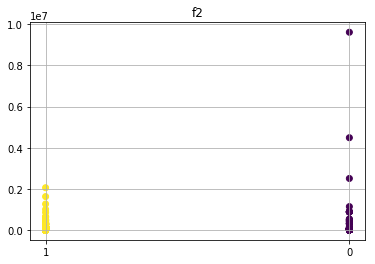

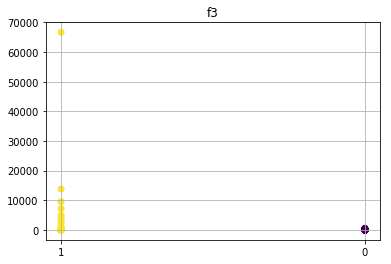

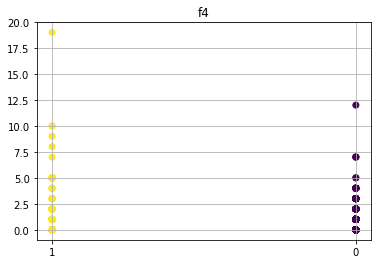

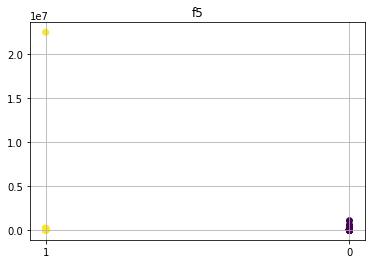

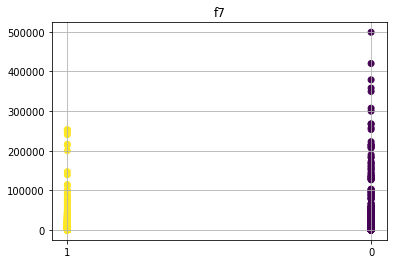

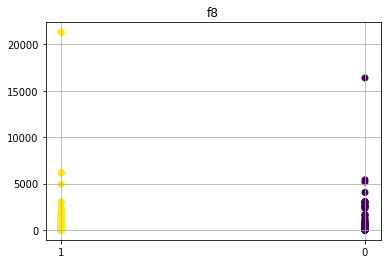

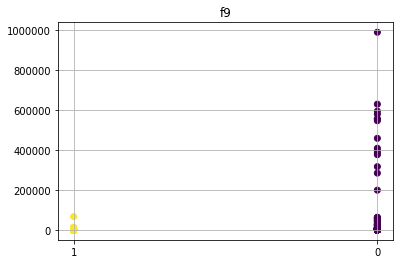

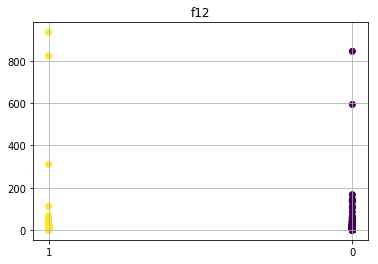

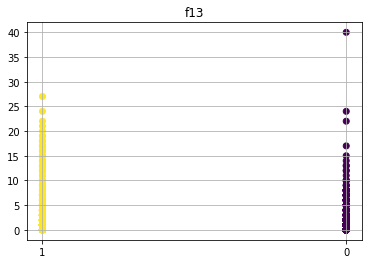

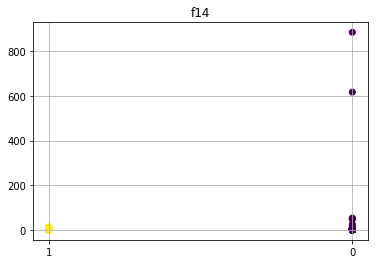

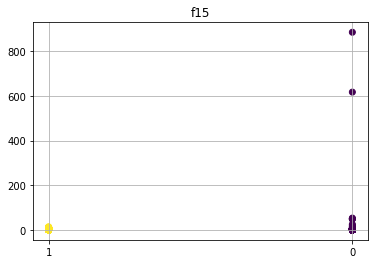

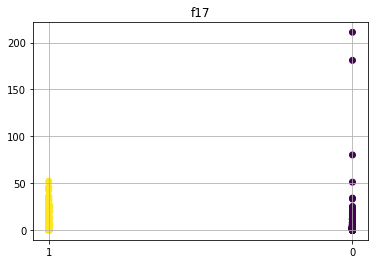

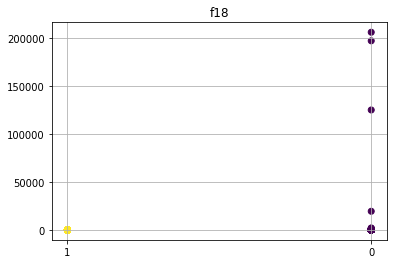

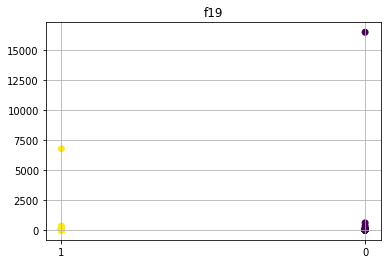

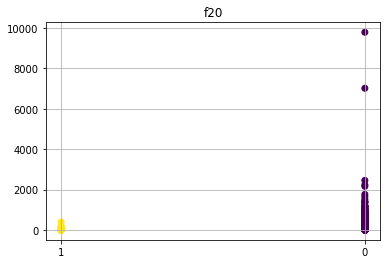

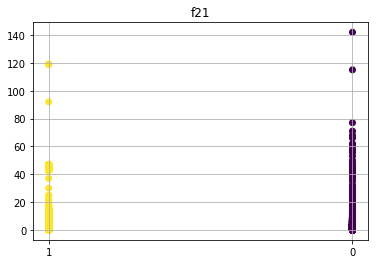

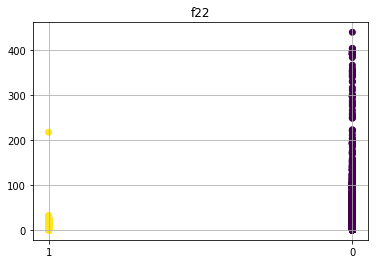

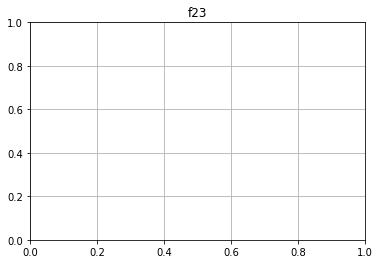

In [71]:
import seaborn as sns
def analyse_continuous_on_label(df, var):
    df = df.copy()
    plt.scatter(df['label'].astype(str),
                      df[var],c = df['label'])
    plt.show()
    plt.grid()
    plt.title(var)

for var in cont_vars:
    analyse_continuous_on_label(data, var)

In [72]:
# capture categorical variables in a list
cat_vars = [var for var in data.columns if data[var].dtypes == 'O']

print('Number of categorical variables: ', len(cat_vars))

Number of categorical variables:  0


In [80]:
for col in data.columns:
    print(data[col].nunique())

2
42765
5397
712
133
12
8
1736
3244
368
5
2
641
57
26
21
1
21
39
48
35
363
59
204
2
4
3
4
2
